In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import statistics as stat

In [2]:
experiment_length = 3000
n_landmark = 4

In [40]:
def truncate(input: float, decimals: int = 2) -> float: 
  """
  Truncate float value from n-th decimal digit on.
  
  Args:
    input: float value
    decimals: number of decimal digits to be kept; 2 by default 
  
  Returns:
    THe truncated float value

  """
  return math.trunc(input * 10**decimals) / 10**decimals

def create_ts(checkpoints: list, total_length: int = experiment_length) -> list:
  '''Create the TS values from the given checkpoints.

  Args:
    checkpoints: int values representing the time a new landmark has been explored
    experiment_length: length of the expriment; not epxlored landmark at this that time 

  Returns:
    a list of length total_length where each element represent represent the numbe rof explored landmarks at a that time 
    (e.g., res[10] = 2 -> 2 explored landmarks at time 11)  

  '''
  l_0 = [0  for _ in range(checkpoints[0])]
  l_1 = [1  for _ in range(checkpoints[0], checkpoints[1])] 
  l_2 = [2  for _ in range(checkpoints[1], checkpoints[2])] 
  l_3 = [3  for _ in range(checkpoints[2], checkpoints[3])]
  l_4 = [4  for _ in range(checkpoints[3], total_length + 1)]
  l_0.extend(l_1)
  l_0.extend(l_2)
  l_0.extend(l_3)
  l_0.extend(l_4)
  return l_0

def goodness(t_checkpoints: list, total_length: int = experiment_length, n_landmarks = n_landmark):
  '''Calcualte the goodness of a given ts
   
  Args:
    t_checkpoints: times of exploration for each landmark
    
  Return:
    A goodness value normalized in [0;1]
  '''
  return truncate(sum(create_ts(t_checkpoints)) / (total_length * n_landmark), 2)

def plot_ts(series: list, legend: list, title: str = ""):
  '''List of ts to be plot.

  Args:
  series: list of ts. Each ts is a list of values ot be plot
  legend: list of string representing the names of the series to plot
  title: title of the plot, By dfault empty string
  '''
  plt.xlabel("time")
  plt.ylabel("explored landmarks")
  plt.title(title)
  plt.ylim(-0.1, 4.1)
  for ts in series:
    print(goodness(ts))  
    ts = create_ts(ts)
    plt.plot([_ for _ in range(len(ts))], ts)
  plt.legend(labels=legend, loc='upper left')
  plt.show()

# Side

0.84
0.83
0.86


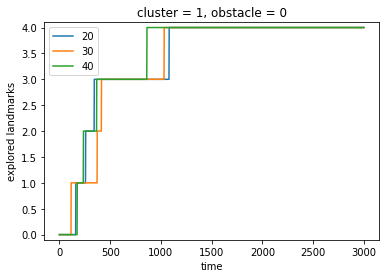

0.64
0.72
0.82


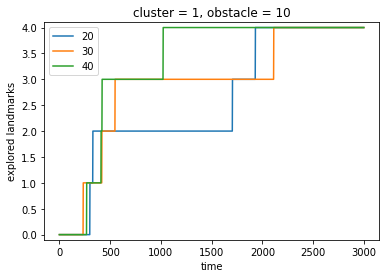

0.64
0.58
0.66


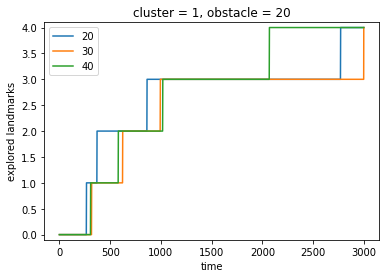

0.37
0.33
0.53


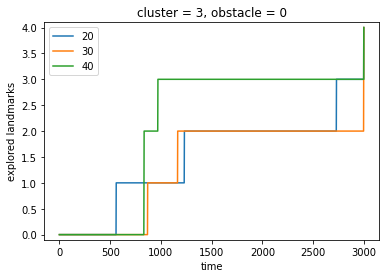

0.0
0.21
0.33


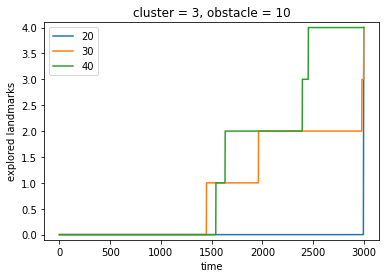

0.0
0.15
0.13


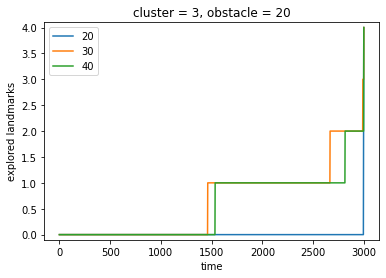

In [41]:
legend = ['20', '30', '40']

t_1_20 = [161, 258, 343, 1081]
t_1_30 = [115, 372, 414, 1032]
t_1_40 = [175, 236, 367, 862]
plot_ts([t_1_20, t_1_30, t_1_40], legend, title = "cluster = 1, obstacle = 0")

t_1_20 = [300, 329, 1705, 1931]
t_1_30 = [234, 418, 548, 2112]
t_1_40 = [268, 410, 420, 1022]
plot_ts([t_1_20, t_1_30, t_1_40], legend, title = "cluster = 1, obstacle = 10")

t_1_20 = [266, 370, 863, 2771]
t_1_30 = [317, 623, 994, 3000]
t_1_40 = [307, 580, 1018, 2069]
plot_ts([t_1_20, t_1_30, t_1_40], legend, title = "cluster = 1, obstacle = 20")

t_3_20 = [559, 1231, 2730, 3000]
t_3_30 = [869, 1165, 2999, 3000]
t_3_40 = [833, 834, 970, 3000]
plot_ts([t_3_20, t_3_30, t_3_40], legend, title = "cluster = 3, obstacle = 0")

t_3_20 = [2997, 2998, 2999, 3000]
t_3_30 = [1449, 1962, 2981, 3000]
t_3_40 = [1542, 1633, 2394, 2453]
plot_ts([t_3_20, t_3_30, t_3_40], legend, title = "cluster = 3, obstacle = 10")

t_3_20 = [2997, 2998, 2999, 3000]
t_3_30 = [1461, 2667, 2990, 3000]
t_3_40 = [1534, 2815, 2999, 3000]
plot_ts([t_3_20, t_3_30, t_3_40], legend, title = "cluster = 3, obstacle = 20")

# Random

0.0
0.36


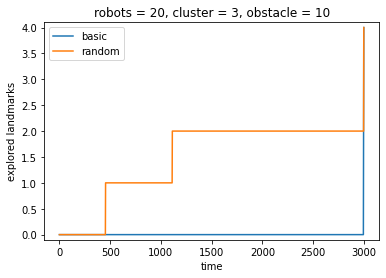

0.21
0.31


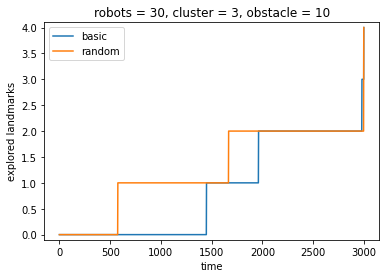

0.33
0.36


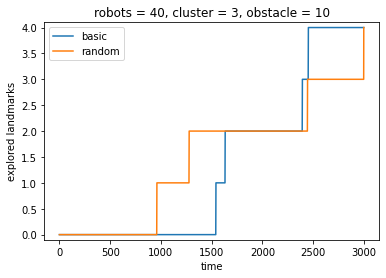

In [45]:
legend = ['basic', 'random']

t_20 = [2997, 2998, 2999, 3000]
random_20 = [454, 1112, 2999, 3000]
plot_ts([t_20, random_20], legend, title = "robots = 20, cluster = 3, obstacle = 10")

t_30 = [1449, 1962, 2981, 3000]
random_30 = [575, 1667, 2999, 3000]
plot_ts([t_30, random_30], legend, title = "robots = 30, cluster = 3, obstacle = 10")

t_40 = [1542, 1633, 2394, 2453]
random_40 = [960, 1278, 2445, 3000]
plot_ts([t_40, random_40], legend, title = "robots = 40, cluster = 3, obstacle = 10")